## Preamble

In [1]:
# Load packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv('Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


## Exploratory Data Analysis

In [64]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

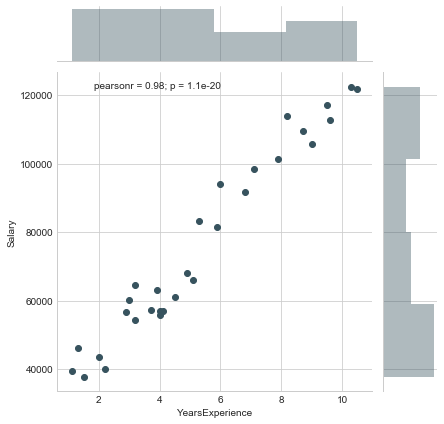

In [4]:
sns.jointplot(x='YearsExperience',y='Salary',data=df)

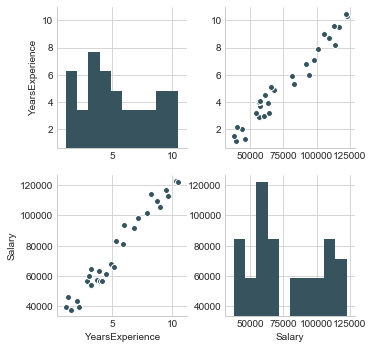

In [5]:
sns.pairplot(df)

So both the variable seem to have a linear relationship. Linear regression should be a good fit.

Let's go ahead and train a linear model.

#### Linear Regression plot with Seaborn:

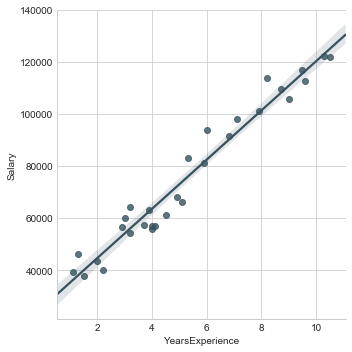

In [29]:
sns.lmplot(x='YearsExperience',y='Salary',data=df)

## Training Linear regression Model

In [18]:
# Load essential packages
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

df_X = df[['YearsExperience']]
df_y = df[['Salary']]

# Split the train and test data
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.333, random_state=0)

In [26]:
lm = LinearRegression(normalize=True)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [27]:
#Print out the coefficients of the model
# The coefficients
print('Coefficient: ', lm.coef_)
print('Intercept: ', lm.intercept_)

Coefficient:  [[ 9345.94244312]]
Intercept:  [ 26816.19224403]


## Prediction for Train and Test Datasets

In [30]:
predictions_train = lm.predict( X_train)
predictions_test = lm.predict( X_test)

Text(0,0.5,'Predicted Y (Testing)')

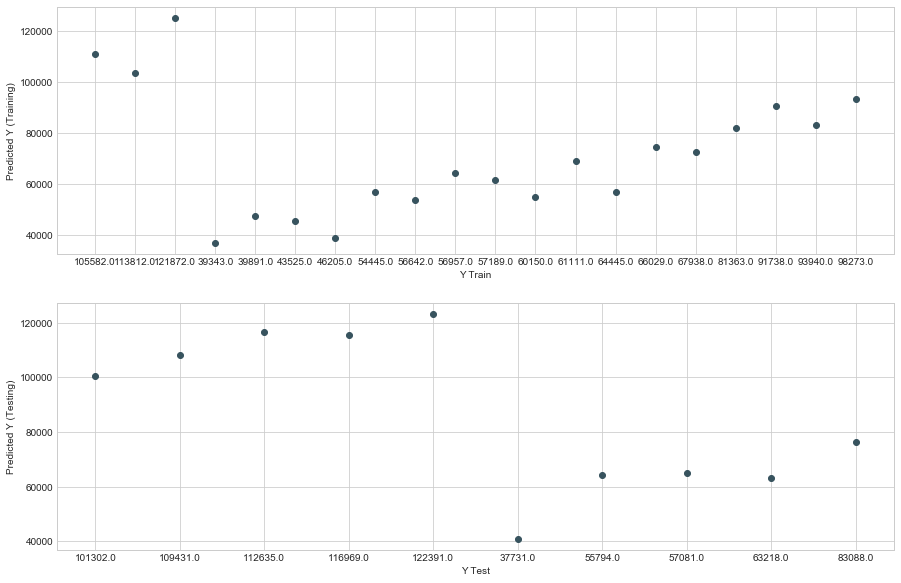

In [65]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize = (15, 10))

ax1.scatter(y_train,predictions_train)

ax1.set_xlabel('Y Train')
ax1.set_ylabel('Predicted Y (Training)')

ax2.scatter(y_test,predictions_test)
ax2.set_xlabel('Y Test')
ax2.set_ylabel('Predicted Y (Testing)')

## Let's check out the errors and residuals

### Evaulation

In [61]:
from sklearn import metrics

print('MAE:', round(metrics.mean_absolute_error(y_test, predictions_test), 3))
print('MSE:', round(metrics.mean_squared_error(y_test, predictions_test), 3))
print('RMSE:', round(np.sqrt(metrics.mean_squared_error(y_test, predictions_test)), 3))

MAE: 3426.427
MSE: 21026037.33
RMSE: 4585.416


### Residuals

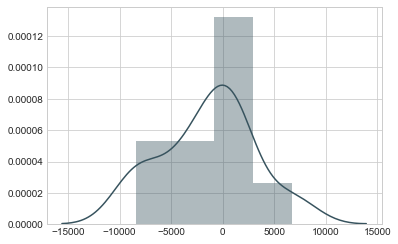

In [71]:
sns.distplot((y_test-predictions_test))

## Conclusion

In [76]:
coeffecients = pd.DataFrame(lm.coef_, df_X.columns)
coeffecients.columns = ['Coeffecient']
round(coeffecients, 3)

,Coeffecient
YearsExperience,9345.942


### Interpretation

1 unit increase in Years of Experience is associated with an increase of 9345.942 units in Salary.